<a href="https://colab.research.google.com/github/InnoSphere/AIMSPEW-InnoBiz-K-Hakathon24/blob/models/models/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


EDA is done here to explore and visualise the data and detect outliers and missing values.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

# import warning
# warning.filterwarning

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/InnoSphere/Malaria/Data/Malaria Incidence Data V3T.csv')

In [ ]:
df.head()

In [ ]:
# df.columns.tolist()

## Indexing the dataframe with **year**

In [ ]:
df.index = pd.date_range('2000', periods=22, freq='Y')

df = df.drop("Year",axis=1)
df.head()

,DRC,Ethiopia,Nigeria,Uganda,Rwanda,Kenya,Algeria,Benin,Burkina Faso,Cabo Verde,...,Gambia,Eritrea,Cote d'Ivoire,"Congo, Rep.",Comoros,Central African Republic,Burundi,Botswana,Angola,Cape
2000-12-31,469523.7312,329440.4088,413334.9609,487225.5193,189410.2446,221627.2955,18.808420,412446.3438,599317.3545,1208.611356,...,312459.6967,17849.20263,496975.0596,353415.5704,66331.56842,441964.2673,448439.5875,16722.03997,325703.6072,1293.49840
2001-12-31,469834.1400,231740.7500,407761.8400,507974.4000,238604.0800,241661.3600,3.247700,432801.7300,601937.7400,944.545450,...,361466.6700,22933.64100,521945.7000,351275.5000,63564.16300,433936.3400,468937.7700,6933.41730,326650.7000,944.54545
2002-12-31,470338.0000,205862.8500,392939.2400,500152.5600,190429.6100,223487.6100,5.344253,448662.3200,595852.0500,659.905550,...,350238.5300,13229.43100,523078.1000,319893.2800,62068.90500,434425.0200,430575.8000,3241.19140,309120.9400,659.90555
2003-12-31,474509.3000,217671.0400,391655.1200,484124.7000,151754.5500,209224.9000,2.638250,460236.9700,585123.3000,581.295970,...,339536.8700,19027.50200,521565.3700,314456.3300,60607.36000,438873.9600,383650.3300,1619.32340,313731.0000,581.29597
2004-12-31,481241.6000,222274.5400,401153.6600,449824.6800,129912.9000,178076.8300,1.041484,479133.4800,562411.3000,379.043130,...,329345.8600,5549.28700,515900.2700,308728.3600,59176.53300,446471.2800,331545.5000,1039.71500,313732.5700,379.04313


# EDA - Exploratory Data Analysis



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2000-12-31 to 2021-12-31
Freq: A-DEC
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DRC                       22 non-null     float64
 1   Ethiopia                  22 non-null     float64
 2   Nigeria                   22 non-null     float64
 3   Uganda                    22 non-null     float64
 4   Rwanda                    22 non-null     float64
 5   Kenya                     22 non-null     float64
 6   Algeria                   22 non-null     float64
 7   Benin                     22 non-null     float64
 8   Burkina Faso              22 non-null     float64
 9   Cabo Verde                22 non-null     float64
 10  Cameroon                  22 non-null     float64
 11  Chad                      22 non-null     float64
 12  Djibouti                  22 non-null     float64
 13  Equatorial Guinea         22 non-nu

In [ ]:
df.describe()

,DRC,Ethiopia,Nigeria,Uganda,Rwanda,Kenya,Algeria,Benin,Burkina Faso,Cabo Verde,...,Gambia,Eritrea,Cote d'Ivoire,"Congo, Rep.",Comoros,Central African Republic,Burundi,Botswana,Angola,Cape
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,389302.553686,150517.909291,355427.313391,376034.468027,215434.136832,105284.335750,3.458176,422522.055232,493954.540614,454.087504,...,232493.611908,21458.073432,394472.896336,248066.850314,40309.203920,389352.623077,269525.015850,2238.301639,238434.104650,465.684090
std,74236.524299,73361.627179,50036.767354,86226.816007,162120.367205,63903.759322,6.721796,41464.260925,91660.549098,634.492786,...,107847.716406,12893.983310,115489.805452,51109.565091,25768.565977,46681.827604,95208.673098,3579.069826,62559.161568,665.894853
min,295763.539300,34086.659260,294110.655500,253514.779700,37947.960000,59616.382250,0.000000,359516.630000,356663.249300,0.000000,...,43834.248150,5549.287000,239805.583300,193949.190000,1531.695237,322872.751500,164608.630000,156.282810,154216.320000,0.000000
25%,320725.734250,105848.900000,303046.728700,286585.734075,115838.566800,64480.670743,0.000000,387766.892125,387872.129725,50.061674,...,130834.357275,12710.203000,271843.217950,211457.888850,14508.863425,338606.567600,186290.766975,552.537496,179875.700025,51.973071
50%,377815.890000,153627.240000,361880.540000,402058.185000,157753.960000,69817.670745,0.489622,417854.163550,530077.350000,308.732422,...,279315.555000,19097.566120,468949.095000,230917.182000,53362.758500,390706.890000,256255.304400,1140.545128,230353.866500,313.770860
75%,469756.537800,202298.760000,406109.795000,430996.807500,235737.724075,128274.582500,3.095338,457343.307500,569069.725000,577.182077,...,311899.972525,26176.369983,485871.680000,281264.227500,60249.653250,434302.850000,302296.392375,1911.429111,307181.442500,577.182077
max,481689.060000,329440.408800,413334.960900,507974.400000,709793.326300,241661.360000,25.046336,486095.030000,601937.740000,2879.745112,...,361466.670000,57271.341350,523078.100000,353415.570400,71686.060000,446471.280000,468937.770000,16722.039970,326650.700000,3026.855200


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

DRC                         0
Ethiopia                    0
Nigeria                     0
Uganda                      0
Rwanda                      0
Kenya                       0
Algeria                     0
Benin                       0
Burkina Faso                0
Cabo Verde                  0
Cameroon                    0
Chad                        0
Djibouti                    0
Equatorial Guinea           0
Gabon                       0
Ghana                       0
Guinea                      0
Guinea-Bissau               0
Liberia                     0
Madagascar                  0
Mali                        0
Mozambique                  0
Namibia                     0
Senegal                     0
South Africa                0
Sudan                       0
Tanzania                    0
Zambia                      0
Zimbabwe                    0
Togo                        0
South Sudan                 0
Somalia                     0
Sierra Leone                0
Niger     

# **Graphical Malaria Incidence Distribution Analysis**

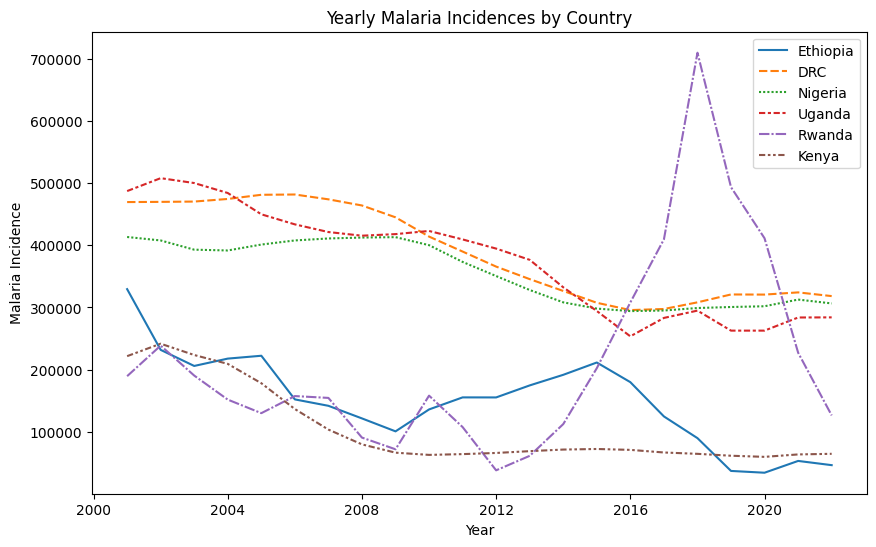

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(df[['Ethiopia', 'DRC', 'Nigeria', 'Uganda', 'Rwanda', 'Kenya']],color='g')

plt.xlabel('Year')
plt.ylabel('Malaria Incidence')
plt.title('Yearly Malaria Incidences by Country')
# plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Malaria Incidence for each Year')

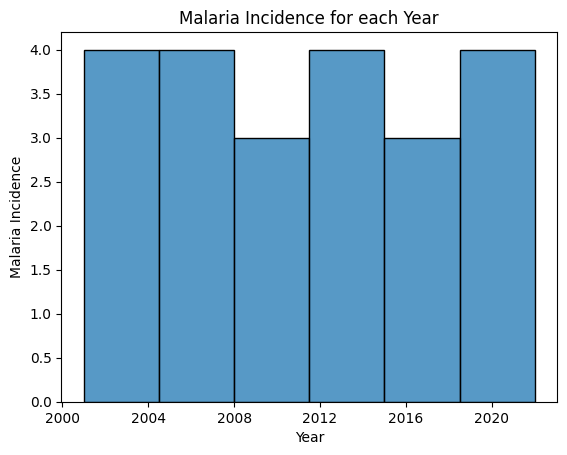

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=df, x=df.index) #, kde=True
ax.set_xlabel('Year')
ax.set_ylabel('Malaria Incidence')
ax.set_title("Malaria Incidence for each Year")

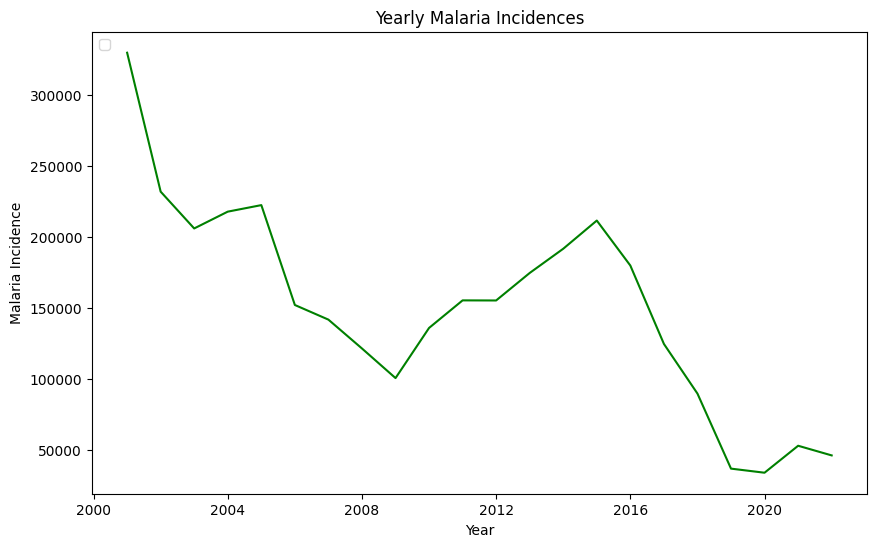

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(df['Ethiopia'],color='g') # distplot

plt.xlabel('Year')
plt.ylabel('Malaria Incidence')
plt.title('Yearly Malaria Incidences')
plt.legend(loc='upper left')

Text(0.5, 1.0, 'Yearly Malaria Incidence of Ethiopia')

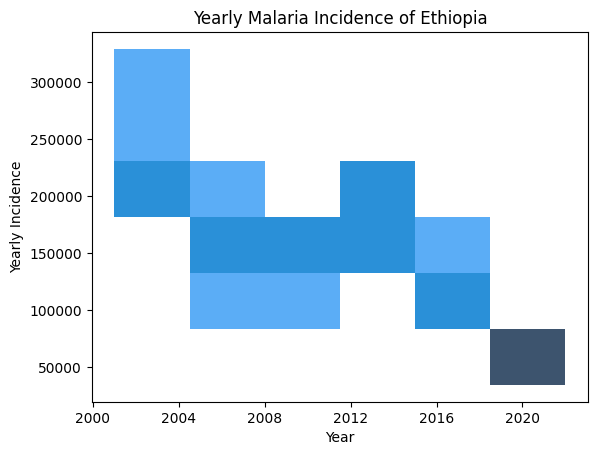

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=df, x=df.index, y=df['Ethiopia'])
ax.set_xlabel('Year')
ax.set_ylabel("Yearly Incidence")
ax.set_title("Yearly Malaria Incidence of Ethiopia")

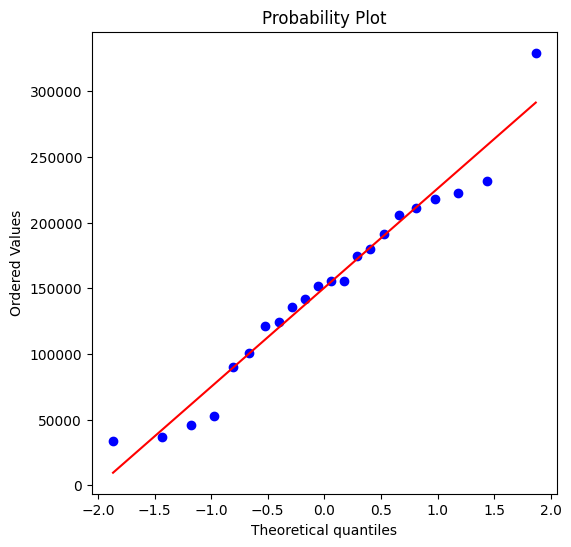

In [ ]:
fig, (ax) = plt.subplots(figsize = (6,6))
res = stats.probplot(df['Ethiopia'],dist='norm', plot=ax)

In [ ]:
print(f"Skewness:{df['Ethiopia'].skew()}")
print(f"Kurtosis: {df['Ethiopia'].kurt()}")

Skewness:0.2578786473231638
Kurtosis: 0.2875889757842316


### **Observation**
* Most of the points lie on the red straight line implying that the data is normally distributed.
* Skewness is less than 0.5
    * it is right skewwed
    * the distribution is fairly symmetrical
* Kurtosis is greater than 0 but less than 0.5
    * the distribution is not too peaked nor too flat
    * outliers are fairly compromisable
    * the dataset has positive kurtosis with this feature- heavy-tailed distribution

# **Detecting and Handling Outliers**
* Plot the numerical features and see which ones have very few or explainable outliers
* Handle the outliers from the features
* Re-analize correlation without feature outliers

* We can use **z-score** to detect outliers
As seen from the kurtosis analysis:
    * Max. temperature and
    * Min. wind speed have outliers.




In [ ]:
df_scaled = StandardScaler().fit_transform(df['Ethiopia'][:,np.newaxis]);
low_range = df_scaled[df_scaled[:,0].argsort()][:10]
high_range= df_scaled[df_scaled[:,0].argsort()][-10:]
print('Outer range (low) of T2M_MAX distribution:')
print(low_range)
print('\nOuter range (high) of T2M_MAX distribution:')
print(high_range)

Outer range (low) of T2M_MAX distribution:
[[-1.62443485]
 [-1.58428726]
 [-1.45456367]
 [-1.35982609]
 [-0.84832569]
 [-0.69592842]
 [-0.40508139]
 [-0.36138569]
 [-0.20389486]
 [-0.12227301]]

Outer range (high) of T2M_MAX distribution:
[[0.06648742]
 [0.33569104]
 [0.40846877]
 [0.57326295]
 [0.77216598]
 [0.84959379]
 [0.93691243]
 [1.00113991]
 [1.13321134]
 [2.49630527]]


<ipython-input-106-fd568d3c1747>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_scaled = StandardScaler().fit_transform(df['Ethiopia'][:,np.newaxis]);


# **Z-Score Analysis**

## **Z-Score Function**

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3 # the accepted z-score range is [-3, 3]
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std #standard scaler
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

## **Outlier for Ethiopia Data**

In [ ]:
outlier_pts = detect_outliers_zscore(df['Ethiopia'])
print("Outliers from Z-scores method: ", outlier_pts)


Outliers from Z-scores method:  []


# **Observations**

As we can see from the outlier detection and z-score calculation, the outliers available for each feature are compromisable with acceptable z-score ranges of [-3,3]
* Going through a series of steps to detect outliers and visualize the data,

    * there are outliers in the datset - kurtosis value indicators
    * the outliers are managable and compromisable - z-score and kurtosis ranges
    * We can ignore the outliers and proceed to the next step.

## **Make Year a Datetime object and Scale the dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
from sklearn import preprocessing


In [ ]:
columnsSc = df.columns.tolist() #['Ethiopia', 'DRC', 'Nigeria', 'Uganda', 'Rwanda', 'Kenya']
scaler = MinMaxScaler(feature_range=(0, 1))
d = scaler.fit_transform(df[columnsSc[1:]])
scaled_df = pd.DataFrame(d, columns=df.columns[1:])

In [ ]:
scaled_df.insert(0, 'Year', value = df.index)

In [ ]:
scaled_df

,Year,Ethiopia,Nigeria,Uganda,Rwanda,Kenya,Algeria,Benin,Burkina Faso,Cabo Verde,...,Gambia,Eritrea,Cote d'Ivoire,"Congo, Rep.",Comoros,Central African Republic,Burundi,Botswana,Angola,Cape
0,2000-12-31,1.000000,1.000000,0.918459,0.225442,0.889950,0.750945,0.418158,0.989317,0.419694,...,0.845712,0.237808,0.907852,1.000000,0.923676,0.963535,0.932645,1.000000,0.994508,0.427341
1,2001-12-31,0.669211,0.953255,1.000000,0.298664,1.000000,0.129668,0.578970,1.000000,0.327996,...,1.000000,0.336111,0.996002,0.986580,0.884228,0.898583,1.000000,0.409105,1.000000,0.312055
2,2002-12-31,0.581595,0.828930,0.969261,0.226959,0.900169,0.213375,0.704273,0.975188,0.229154,...,0.964651,0.148489,1.000000,0.789785,0.862914,0.902537,0.873946,0.186222,0.898340,0.218017
3,2003-12-31,0.621575,0.818159,0.906273,0.169394,0.821822,0.105335,0.795715,0.931446,0.201857,...,0.930959,0.260589,0.994660,0.755690,0.842081,0.938532,0.719753,0.088317,0.925075,0.192046
4,2004-12-31,0.637161,0.897829,0.771478,0.136884,0.650721,0.041582,0.945002,0.838848,0.131624,...,0.898874,0.000000,0.974661,0.719770,0.821686,1.000000,0.548541,0.053329,0.925084,0.125227
5,2005-12-31,0.399360,0.953453,0.707894,0.177808,0.422517,0.020504,1.000000,0.722382,0.196142,...,0.868204,0.082039,0.869383,0.584354,0.801693,0.986525,0.420687,0.064761,0.938362,0.186610
6,2006-12-31,0.364537,0.980092,0.659419,0.173423,0.241046,0.020205,0.995982,0.658081,0.227737,...,0.838663,0.001617,0.832895,0.437118,0.782143,0.948490,0.319950,0.228671,0.853349,0.216668
7,2007-12-31,0.295906,0.992452,0.636245,0.078426,0.110368,0.517236,0.967680,0.691659,0.050605,...,0.809985,0.135104,0.817166,0.297602,0.763012,0.885384,0.193587,0.053291,0.696592,0.048145
8,2008-12-31,0.225325,0.997966,0.646255,0.050355,0.036916,0.058713,0.852260,0.811663,0.097216,...,0.782003,0.023803,0.840622,0.157205,0.744314,0.808532,0.107364,0.107349,0.459524,0.092491
9,2009-12-31,0.344729,0.889626,0.666261,0.178839,0.017317,0.000000,0.657307,0.877823,0.178384,...,0.754676,0.064093,0.866471,0.076734,0.726015,0.701498,0.033579,0.117298,0.247029,0.169714


## **Save the preprocessed dataset for later use**

In [ ]:
scaled_df.to_csv('/content/drive/MyDrive/Colab Notebooks/InnoSphere/Malaria/Data/scaled_df.csv')